# Stock Market Analysis

### Problem Link : https://www.kaggle.com/daiearth22/uniqlo-fastretailing-stock-price-prediction/data

#### Necessary Import Statements

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import Series
from pandas import DataFrame
from pandas import concat

# Train test split
from sklearn.model_selection import TimeSeriesSplit


# Models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor

# Model evaluators
from sklearn.metrics import f1_score,confusion_matrix

### Reading the Train Data

In [2]:
# For Google Colab, uncomment the lines below

!wget https://www.dropbox.com/s/22nfk89c8hshxhs/Train.csv
train = pd.read_csv("Train.csv")

--2019-05-11 22:12:52--  https://www.dropbox.com/s/22nfk89c8hshxhs/Train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/22nfk89c8hshxhs/Train.csv [following]
--2019-05-11 22:12:53--  https://www.dropbox.com/s/raw/22nfk89c8hshxhs/Train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3cf8c78beb469bad7bed4860a.dl.dropboxusercontent.com/cd/0/inline/AgtJ34damFmK-NeCWtcbwkQThtbCE6yp0YoCEpYp6fY92sGjljYR82TyGpkUHf0f3U6PNU-6wWmWozcr08xGJzfeYtyBFzVsBGRuvIeTrMzFog/file# [following]
--2019-05-11 22:12:54--  https://ucb3cf8c78beb469bad7bed4860a.dl.dropboxusercontent.com/cd/0/inline/AgtJ34damFmK-NeCWtcbwkQThtbCE6yp0YoCEpYp6fY92sGjljYR82TyGpkUHf0f3U6PNU-6wWmWozcr08xGJzfeYtyBFzVsBGRuvIeTrMzFog/file
Resolving ucb3cf8c78beb46

In [0]:
# For Jupyter Notebook, uncomment the lines below

# train = pd.read_csv("stock_train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
Date             1226 non-null object
Open             1226 non-null int64
High             1226 non-null int64
Low              1226 non-null int64
Close            1226 non-null int64
Volume           1226 non-null int64
Stock Trading    1226 non-null int64
dtypes: int64(6), object(1)
memory usage: 67.1+ KB


In [5]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [6]:
train['Date'] = train['Date'].apply(pd.to_datetime)
train.set_index('Date', inplace=True)
train.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [7]:
type(train.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
train.sort_index(inplace=True)
train.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,14360,14750,14280,14590,1043400,15191988000


In [0]:
train['VWAP-Day'] = train['Stock Trading'] / train['Volume']

In [10]:
train.head()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day
Date,,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000,13807.554999
2012-01-05,13720,13840,13600,13800,511500,7030811000,13745.476051
2012-01-06,13990,14030,13790,13850,765500,10635609000,13893.676029
2012-01-10,13890,14390,13860,14390,952300,13533413000,14211.291610
2012-01-11,14360,14750,14280,14590,1043400,15191988000,14560.080506


In [11]:
train.describe()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03,1226.000000
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10,33763.026423
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10,10812.850207
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09,13745.476051
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10,27754.215142
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10,34402.817572
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10,41362.554281
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11,61515.769283


In [12]:
train.head()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day
Date,,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000,13807.554999
2012-01-05,13720,13840,13600,13800,511500,7030811000,13745.476051
2012-01-06,13990,14030,13790,13850,765500,10635609000,13893.676029
2012-01-10,13890,14390,13860,14390,952300,13533413000,14211.291610
2012-01-11,14360,14750,14280,14590,1043400,15191988000,14560.080506


In [13]:
train.tail()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day
Date,,,,,,,
2016-12-26,43310,43660,43090,43340,358200,15547803000,43405.368509
2016-12-27,43140,43700,43140,43620,400100,17427993000,43559.092727
2016-12-28,43940,43970,43270,43270,339900,14780670000,43485.348632
2016-12-29,43000,43220,42540,42660,448400,19188227000,42792.656111
2016-12-30,42120,42330,41700,41830,610000,25628028000,42013.160656


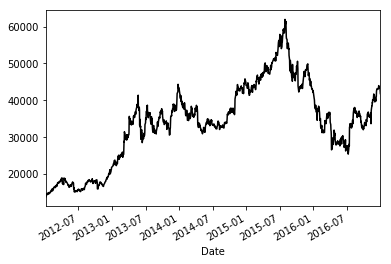

In [14]:
train['Close'].plot(color='k')

In [15]:
train.head()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day
Date,,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000,13807.554999
2012-01-05,13720,13840,13600,13800,511500,7030811000,13745.476051
2012-01-06,13990,14030,13790,13850,765500,10635609000,13893.676029
2012-01-10,13890,14390,13860,14390,952300,13533413000,14211.291610
2012-01-11,14360,14750,14280,14590,1043400,15191988000,14560.080506


Function for dropping of unnecesary features or redundant features

In [0]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

### Applying the TimeSeries Feature Engineering
#### Lag Features

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226 entries, 2012-01-04 to 2016-12-30
Data columns (total 7 columns):
Open             1226 non-null int64
High             1226 non-null int64
Low              1226 non-null int64
Close            1226 non-null int64
Volume           1226 non-null int64
Stock Trading    1226 non-null int64
VWAP-Day         1226 non-null float64
dtypes: float64(1), int64(6)
memory usage: 76.6 KB


In [0]:
close_vals = Series(train['Close'])

In [19]:
close_vals.head()

Date
2012-01-04    13720
2012-01-05    13800
2012-01-06    13850
2012-01-10    14390
2012-01-11    14590
Name: Close, dtype: int64

In [20]:
close_vals.shift(1).head()

Date
2012-01-04        NaN
2012-01-05    13720.0
2012-01-06    13800.0
2012-01-10    13850.0
2012-01-11    14390.0
Name: Close, dtype: float64

In [21]:
close_vals.shift(1).tail()

Date
2016-12-26    43480.0
2016-12-27    43340.0
2016-12-28    43620.0
2016-12-29    43270.0
2016-12-30    42660.0
Name: Close, dtype: float64

In [22]:
#Applying Lag Features to Opening Price
close1 = train['Close']
close_df = concat([close1.shift(3), close1.shift(2), close1.shift(1)], axis=1)
close_df.columns = ['C_t-3', 'C_t-2', 'C_t-1']
close_df.shape

(1226, 3)

In [23]:
close_df.head()

,C_t-3,C_t-2,C_t-1
Date,,,
2012-01-04,NaN,NaN,NaN
2012-01-05,NaN,NaN,13720.0
2012-01-06,NaN,13720.0,13800.0
2012-01-10,13720.0,13800.0,13850.0
2012-01-11,13800.0,13850.0,14390.0


In [0]:
#combining the train data and the lag features of Temp
train1 = pd.concat([train, close_df], axis=1)

In [25]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day,C_t-3,C_t-2,C_t-1
Date,,,,,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000,13807.554999,NaN,NaN,NaN
2012-01-05,13720,13840,13600,13800,511500,7030811000,13745.476051,NaN,NaN,13720.0
2012-01-06,13990,14030,13790,13850,765500,10635609000,13893.676029,NaN,13720.0,13800.0
2012-01-10,13890,14390,13860,14390,952300,13533413000,14211.291610,13720.0,13800.0,13850.0
2012-01-11,14360,14750,14280,14590,1043400,15191988000,14560.080506,13800.0,13850.0,14390.0


In [26]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day,C_t-3,C_t-2,C_t-1
Date,,,,,,,,,,
2016-12-26,43310,43660,43090,43340,358200,15547803000,43405.368509,43620.0,44000.0,43480.0
2016-12-27,43140,43700,43140,43620,400100,17427993000,43559.092727,44000.0,43480.0,43340.0
2016-12-28,43940,43970,43270,43270,339900,14780670000,43485.348632,43480.0,43340.0,43620.0
2016-12-29,43000,43220,42540,42660,448400,19188227000,42792.656111,43340.0,43620.0,43270.0
2016-12-30,42120,42330,41700,41830,610000,25628028000,42013.160656,43620.0,43270.0,42660.0


In [27]:
train1.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
VWAP-Day         0
C_t-3            3
C_t-2            2
C_t-1            1
dtype: int64

In [0]:
#dropping null value rows
train1.dropna(inplace = True)

In [29]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,VWAP-Day,C_t-3,C_t-2,C_t-1
Date,,,,,,,,,,
2012-01-10,13890,14390,13860,14390,952300,13533413000,14211.291610,13720.0,13800.0,13850.0
2012-01-11,14360,14750,14280,14590,1043400,15191988000,14560.080506,13800.0,13850.0,14390.0
2012-01-12,14520,14600,14330,14520,540500,7814121000,14457.208141,13850.0,14390.0,14590.0
2012-01-13,14740,14780,14450,14770,1543700,22669096000,14684.910280,14390.0,14590.0,14520.0
2012-01-16,14610,14670,14530,14610,360100,5255652000,14594.979172,14590.0,14520.0,14770.0


In [30]:
train1.shape

(1223, 10)

# BL NOTE - CONTINUE HERE

#### Rolling Window Statistics

In [35]:
# Appling window Features for the Highest Value Feature
high = train['High']
w = 5
high.head()

Date
2012-01-04    14050
2012-01-05    13840
2012-01-06    14030
2012-01-10    14390
2012-01-11    14750
Name: High, dtype: int64

In [36]:
shift = high.shift(w-1)
shift.head()

Date
2012-01-04        NaN
2012-01-05        NaN
2012-01-06        NaN
2012-01-10        NaN
2012-01-11    14050.0
Name: High, dtype: float64

In [37]:
train['High'].head(8)

Date
2012-01-04    14050
2012-01-05    13840
2012-01-06    14030
2012-01-10    14390
2012-01-11    14750
2012-01-12    14600
2012-01-13    14780
2012-01-16    14670
Name: High, dtype: int64

In [0]:
shift.head(8)

0    43660.0
1    43840.0
2    44370.0
3    43630.0
4    43150.0
5    43550.0
6    43880.0
7    43440.0
Name: High, dtype: float64

In [0]:
shift.head()

0    43660.0
1    43840.0
2    44370.0
3    43630.0
4    43150.0
Name: High, dtype: float64

In [0]:
window = shift.rolling(window=w)

In [0]:
type(window)

pandas.core.window.Rolling

In [0]:
window.min().head()

0        NaN
1        NaN
2        NaN
3        NaN
4    43150.0
Name: High, dtype: float64

In [0]:
window.min()

0           NaN
1           NaN
2           NaN
3           NaN
4       43150.0
5       43150.0
6       43150.0
7       43150.0
8       43150.0
9       43300.0
10      42970.0
11      41560.0
12      41150.0
13      40500.0
14      40350.0
15      40350.0
16      40350.0
17      40340.0
18      40340.0
19      40340.0
20      40340.0
21      40340.0
22      40360.0
23      40270.0
24      40270.0
25      39710.0
26      39710.0
27      38980.0
28      38690.0
29      37940.0
         ...   
1196    15650.0
1197    15650.0
1198    15650.0
1199    15680.0
1200    15520.0
1201    15480.0
1202    15250.0
1203    15200.0
1204    15200.0
1205    15030.0
1206    15020.0
1207    15020.0
1208    15020.0
1209    14790.0
1210    14790.0
1211    14790.0
1212    14790.0
1213    14790.0
1214    14670.0
1215    14670.0
1216    14600.0
1217    14600.0
1218    14390.0
1219    14030.0
1220    13840.0
1221    13840.0
1222        NaN
1223        NaN
1224        NaN
1225        NaN
Name: High, Length: 1226

In [0]:
window.min().tail(50)

1176    17400.0
1177    16950.0
1178    16950.0
1179    16950.0
1180    16950.0
1181    16950.0
1182    17000.0
1183    16720.0
1184    16670.0
1185    16670.0
1186    16670.0
1187    16670.0
1188    16480.0
1189    16480.0
1190    16480.0
1191    16180.0
1192    16180.0
1193    15770.0
1194    15650.0
1195    15650.0
1196    15650.0
1197    15650.0
1198    15650.0
1199    15680.0
1200    15520.0
1201    15480.0
1202    15250.0
1203    15200.0
1204    15200.0
1205    15030.0
1206    15020.0
1207    15020.0
1208    15020.0
1209    14790.0
1210    14790.0
1211    14790.0
1212    14790.0
1213    14790.0
1214    14670.0
1215    14670.0
1216    14600.0
1217    14600.0
1218    14390.0
1219    14030.0
1220    13840.0
1221    13840.0
1222        NaN
1223        NaN
1224        NaN
1225        NaN
Name: High, dtype: float64

In [0]:
df = concat([window.min(), window.mean(), window.max()], axis=1)
df.columns = ['min', 'mean', 'max']

In [0]:
df.head(10)

,min,mean,max
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,43150.0,43730.0,44370.0
5,43150.0,43708.0,44370.0
6,43150.0,43716.0,44370.0
7,43150.0,43530.0,43880.0
8,43150.0,43464.0,43880.0
9,43300.0,43634.0,44000.0


In [0]:
#combining the train1 and the rolling window features
train2 = pd.concat([train1, df], axis=1)

In [0]:
train2.head()

,Open,High,Low,Close,Volume,Stock Trading,Avg,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max
0,42120.0,42330.0,41700.0,41830.0,610000.0,2.562803e+10,42013.160656,2016.0,12.0,30.0,43140.0,43940.0,43000.0,43620.0,43270.0,42660.0,NaN,NaN,NaN
1,43000.0,43220.0,42540.0,42660.0,448400.0,1.918823e+10,42792.656111,2016.0,12.0,29.0,43310.0,43140.0,43940.0,43340.0,43620.0,43270.0,NaN,NaN,NaN
2,43940.0,43970.0,43270.0,43270.0,339900.0,1.478067e+10,43485.348632,2016.0,12.0,28.0,43660.0,43310.0,43140.0,43480.0,43340.0,43620.0,NaN,NaN,NaN
3,43140.0,43700.0,43140.0,43620.0,400100.0,1.742799e+10,43559.092727,2016.0,12.0,27.0,43900.0,43660.0,43310.0,44000.0,43480.0,43340.0,NaN,NaN,NaN
4,43310.0,43660.0,43090.0,43340.0,358200.0,1.554780e+10,43405.368509,2016.0,12.0,26.0,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0,43150.0,43730.0,44370.0


In [0]:
train2.tail()

,Open,High,Low,Close,Volume,Stock Trading,Avg,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max
1221,14360.0,14750.0,14280.0,14590.0,1043400.0,1.519199e+10,14560.080506,2012.0,1.0,11.0,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0,13840.0,14212.0,14750.0
1222,13890.0,14390.0,13860.0,14390.0,952300.0,1.353341e+10,14211.291610,2012.0,1.0,10.0,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0,NaN,NaN,NaN
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Expanding window Statistics

In [0]:
train2.dropna(inplace=True)

In [0]:
train2.head()

,Open,High,Low,Close,Volume,Stock Trading,Avg,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max
4,43310.0,43660.0,43090.0,43340.0,358200.0,1.554780e+10,43405.368509,2016.0,12.0,26.0,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0,43150.0,43730.0,44370.0
5,43660.0,43840.0,43190.0,43480.0,381600.0,1.658649e+10,43465.647275,2016.0,12.0,22.0,42790.0,42910.0,43900.0,43130.0,43620.0,44000.0,43150.0,43708.0,44370.0
6,43900.0,44370.0,43610.0,44000.0,658900.0,2.899432e+10,44004.122022,2016.0,12.0,21.0,43350.0,42790.0,42910.0,43130.0,43130.0,43620.0,43150.0,43716.0,44370.0
7,42910.0,43630.0,42860.0,43620.0,499400.0,2.160610e+10,43264.120945,2016.0,12.0,20.0,43440.0,43350.0,42790.0,43000.0,43130.0,43130.0,43150.0,43530.0,43880.0
8,42790.0,43150.0,42740.0,43130.0,358700.0,1.542853e+10,43012.352941,2016.0,12.0,19.0,43300.0,43440.0,43350.0,43090.0,43000.0,43130.0,43150.0,43464.0,43880.0


In [0]:
#Applying Expanding window for the Lowest Value
low= train['Low']
window = low.expanding(5)
dfc = concat([window.min(), window.mean(), window.max()], axis=1)
dfc.columns = ['min', 'mean', 'max']

In [0]:
#no null values
dfc.shape

(1226, 3)

In [0]:
#to make it equal to the train2, dropping forst 4 values
#dfc.drop(dfc.head(4).index, inplace=True)

In [0]:
dfc.shape

(1226, 3)

In [0]:
#concating the expanding window features to the previous train2.
train_final = pd.concat([train2, dfc], axis=1)

In [0]:
train_final.tail()

,Open,High,Low,Close,Volume,Stock Trading,Avg,Year,Month,Day,...,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,min,mean,max
1221,14360.0,14750.0,14280.0,14590.0,1043400.0,1.519199e+10,14560.080506,2012.0,1.0,11.0,...,13890.0,13800.0,13850.0,14390.0,13840.0,14212.0,14750.0,14280.0,33412.094926,60740.0
1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13860.0,33396.107931,60740.0
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13790.0,33380.089869,60740.0
1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13600.0,33363.942857,60740.0
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13600.0,33347.903752,60740.0


In [0]:
#Replacing the null values with -1 if any.
train_final.dropna(inplace = True)

In [0]:
#Complete final Train Data
train_final.shape

(1218, 22)

In [0]:
train_final.drop('High',axis=1,inplace=True)
train_final.drop('Low',axis=1,inplace=True)
train_final.drop('Open',axis=1,inplace=True)

### Splitting of Data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 4 to 1221
Data columns (total 19 columns):
Close            1218 non-null float64
Volume           1218 non-null float64
Stock Trading    1218 non-null float64
Avg              1218 non-null float64
Year             1218 non-null float64
Month            1218 non-null float64
Day              1218 non-null float64
O_t-3            1218 non-null float64
O_t-2            1218 non-null float64
O_t-1            1218 non-null float64
C_t-3            1218 non-null float64
C_t-2            1218 non-null float64
C_t-1            1218 non-null float64
min              1218 non-null float64
mean             1218 non-null float64
max              1218 non-null float64
min              1218 non-null float64
mean             1218 non-null float64
max              1218 non-null float64
dtypes: float64(19)
memory usage: 190.3 KB


In [0]:
train_final.drop(['Avg'],axis=1,inplace=True)


In [0]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 4 to 1221
Data columns (total 18 columns):
Close            1218 non-null float64
Volume           1218 non-null float64
Stock Trading    1218 non-null float64
Year             1218 non-null float64
Month            1218 non-null float64
Day              1218 non-null float64
O_t-3            1218 non-null float64
O_t-2            1218 non-null float64
O_t-1            1218 non-null float64
C_t-3            1218 non-null float64
C_t-2            1218 non-null float64
C_t-1            1218 non-null float64
min              1218 non-null float64
mean             1218 non-null float64
max              1218 non-null float64
min              1218 non-null float64
mean             1218 non-null float64
max              1218 non-null float64
dtypes: float64(18)
memory usage: 180.8 KB


In [0]:

X_train,X_test,y_train,y_test = train_test_split(train_final.drop('Close',axis=1)
                                                 ,train_final['Close'],random_state=42)

In [0]:
X_train.head()

,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,min,mean,max
465,354300.0,1.559639e+10,2015.0,2.0,6.0,43245.0,43100.0,43560.0,42185.0,43850.0,43475.0,43350.0,43834.0,44270.0,25305.0,40775.987124,60740.0
140,662200.0,1.984341e+10,2016.0,6.0,7.0,28800.0,29205.0,29420.0,28180.0,30120.0,30090.0,28800.0,29897.0,30450.0,25305.0,34756.985816,43610.0
1010,298200.0,5.013973e+09,2012.0,11.0,12.0,17480.0,17220.0,17050.0,17380.0,17140.0,16870.0,16950.0,17284.0,17530.0,16620.0,36890.267062,60740.0
437,601700.0,2.742257e+10,2015.0,3.0,19.0,46190.0,46810.0,46295.0,46265.0,46200.0,46140.0,45930.0,46476.0,46845.0,25305.0,40526.689498,60740.0
7,499400.0,2.160610e+10,2016.0,12.0,20.0,43440.0,43350.0,42790.0,43000.0,43130.0,43130.0,43150.0,43530.0,43880.0,41700.0,42925.000000,43610.0


### Applying Regressor Model

In [0]:
model=RandomForestRegressor()


In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
import pickle
filename = 'model.pic'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

In [0]:
new_model = model

In [0]:
predict=model.predict(X_test)

In [0]:
model.coef_

AttributeError: ignored

In [0]:
model.feature_importances_

array([4.34101550e-04, 4.47706593e-04, 2.57852993e-05, 1.91600154e-04,
       4.08874368e-04, 2.78269249e-04, 1.17336914e-02, 7.32409324e-02,
       8.38528168e-03, 4.70395459e-02, 6.63099264e-01, 1.93369814e-02,
       2.71777810e-02, 1.43306960e-01, 4.24170832e-03, 6.28404762e-04,
       2.31115157e-05])

In [0]:
imp_list = list(model.feature_importances_)

In [0]:
col_lis = list(X_test.columns)

In [0]:
fi = {i[0]:"{0:.4f}".format(i[1]) for i in list(zip(col_lis,imp_list))}

In [0]:
fi

{'C_t-1': '0.6631',
 'C_t-2': '0.0470',
 'C_t-3': '0.0084',
 'Day': '0.0004',
 'Month': '0.0002',
 'O_t-1': '0.0732',
 'O_t-2': '0.0117',
 'O_t-3': '0.0003',
 'Stock Trading': '0.0004',
 'Volume': '0.0004',
 'Year': '0.0000',
 'max': '0.0000',
 'mean': '0.0006',
 'min': '0.0042'}

#### Measuring the Score. (Evaluation Metrics)

In [0]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 646.3967213114754
MSE: 767356.731147541
RMSE: 875.9890017274994


In [0]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_test, y_test,cv=5))

[0.99406719 0.98846661 0.99312952 0.99045421 0.99165043]
